In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
        
DATA_DIR = '../../../data/'
print(os.listdir(DATA_DIR))

['CleanLoLMatchHistory2.csv', 'openaq.csv', 'CleanLoLMatchHistory3.csv', '.DS_Store', 'LoLMatchHistory.txt', 'CleanLoLMatchHistory.csv', 'LoL Match Making Statistics.ipynb', '~$CleanLoLMatchHistory3.xlsx', '.ipynb_checkpoints', 'CleanLoLMatchHistory3.xlsx', 'LolUpdatedStats.txt', 'CleanLoLMatchHistoryUpdate.csv']


In [38]:
filename = DATA_DIR + 'CleanLoLMatchHistory2.csv'
df = pd.read_csv(filename)
df.head()

,Level,Champion,Score,Game Mode,Creep Score,Gold,Minutes,Date,Rank,Experience Gained,Kills,Deaths,Assists,Game Status
0,15,Vayne,C / +188 XP,Summoner's Rift,169,9.8k,33:44:00,10/14/2018,C,188,3,6,6,-1
1,16,Shen,B- / +223 XP,Summoner's Rift,144,11.8k,40:20:00,10/13/2018,B-,223,5,7,15,-1
2,12,Shen,A-,Summoner's Rift,39,6.2k,25:50:00,10/13/2018,A-,0,0,0,13,1
3,12,Vayne,A+ / +146 XP,Summoner's Rift,137,9.9k,21:05,10/13/2018,A+,146,9,2,8,1
4,12,Vayne,B+ / +144 XP,Summoner's Rift,86,8.4k,20:53,10/13/2018,B+,144,6,2,6,1


In [39]:
def parse_gold(x):
    if('k' in x):
        x = x.replace('k','')
        return float(x) * 1000
    else:
        return float(x)

df.columns = df.columns.str.lower().str.replace(' ', '_')
df['gold'] = df['gold'].apply(parse_gold)


In [36]:
df.head()
df.

,level,champion,score,game_mode,creep_score,gold,minutes,date,rank,experience_gained,kills,deaths,assists,game_status
0,15,Vayne,C / +188 XP,Summoner's Rift,169,9800.0,33:44:00,10/14/2018,C,188,3,6,6,-1
1,16,Shen,B- / +223 XP,Summoner's Rift,144,11800.0,40:20:00,10/13/2018,B-,223,5,7,15,-1
2,12,Shen,A-,Summoner's Rift,39,6200.0,25:50:00,10/13/2018,A-,0,0,0,13,1
3,12,Vayne,A+ / +146 XP,Summoner's Rift,137,9900.0,21:05,10/13/2018,A+,146,9,2,8,1
4,12,Vayne,B+ / +144 XP,Summoner's Rift,86,8400.0,20:53,10/13/2018,B+,144,6,2,6,1


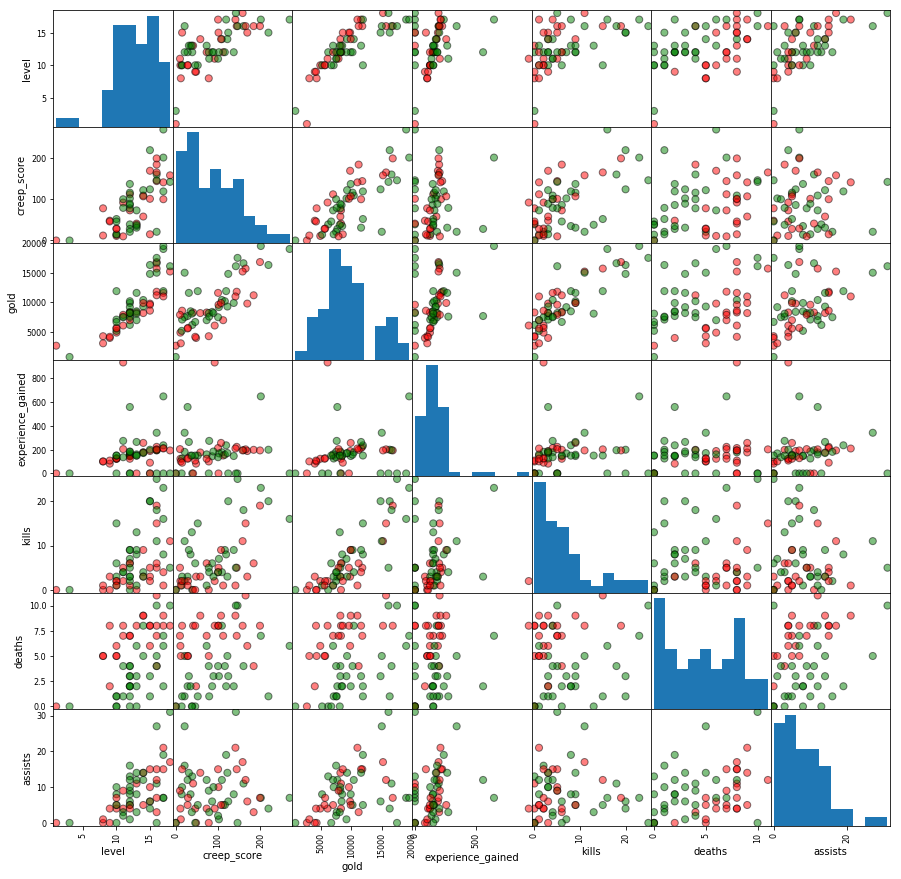

In [4]:
color_list = ['red' if i==-1  else 'green' for i in df.loc[:,'game_status']]
pd.plotting.scatter_matrix(df.loc[:, df.columns != 'game_status'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       edgecolor= "black")
plt.show()

In [7]:
def get_status(n):
    if n == 1:
        return 'Win'
    elif n == 0:
        return 'Draw'
    elif n == -1:
        return 'Lose'
    
# df_Win['game_status'] = df_Win['game_status'].apply(get_status)

/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


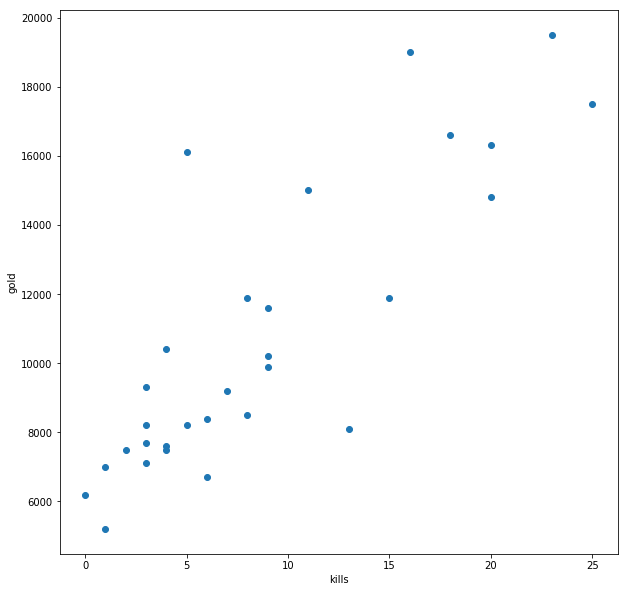

In [8]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable

target_col = 'game_status'
x_col = 'kills'
y_col = 'gold'
df_Win = df[df['game_status'] == 1]
df_Win['game_status'] = df_Win['game_status'].apply(get_status)
x = np.array(df_Win.loc[:,x_col]).reshape(-1,1)
y = np.array(df_Win.loc[:,y_col]).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

### Linear Regression

R^2 score:  0.7034073256997561


/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


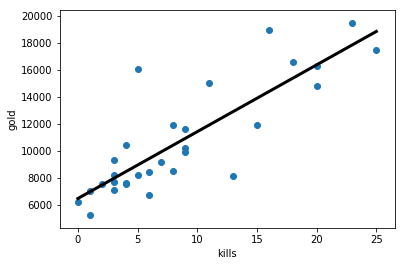

In [9]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
x = np.array(df_Win.loc[:,x_col]).reshape(-1,1)
y = np.array(df_Win.loc[:,y_col]).reshape(-1,1)
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

### Cross Validation

In [10]:
# CV

reg = LinearRegression()
k = 5
x = np.array(df_Win.loc[:,x_col]).reshape(-1,1)
y = np.array(df_Win.loc[:,y_col]).reshape(-1,1)
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [ 0.77609942  0.77571613  0.53220563  0.58948181 -0.86965763]
CV scores average:  0.36076907370243794


### Lasso Regression

Lasso coefficients:  [ 0.00000000e+00  6.51640674e-05  0.00000000e+00 -1.49697449e-01
  3.05482816e-05  0.00000000e+00]


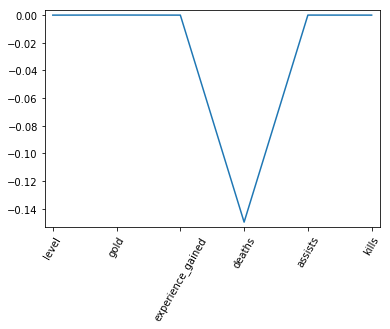

In [11]:
# Lasso
parsed_df = df[['level','gold','experience_gained','deaths','assists','kills']]
X = np.array(df.loc[:,['level','gold','experience_gained','deaths','assists','kills']])
y = df.loc[:,'game_status']
#x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 42, test_size = 0.3)

#Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = 0.022, normalize = True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_

# ridge_predict = lasso.predict(x_test)
# print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso_coef)
#Plot the coefficients
plt.figure()
plt.plot(range(len(parsed_df.columns)), lasso_coef)
plt.xticks(range(len(parsed_df.columns)), parsed_df.columns.values, rotation=60)
plt.margins(0.025)
plt.show()


### Ridge Regression

In [12]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

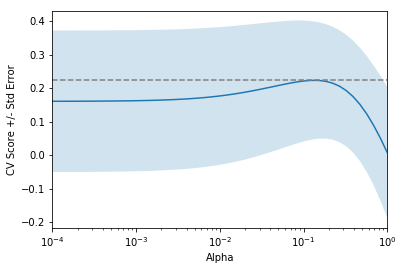

In [13]:
# Ridge

y = np.array(df.loc[:,'game_status'])
# Setup the array of alphas and lists to s
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:
    
    # Specify the alpha value to use: ridge_alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv =10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
display_plot(ridge_scores, ridge_scores_std)
# x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
# ridge = Ridge(alpha = 0.1, normalize = True)
# ridge.fit(x_train,y_train)
# ridge_predict = ridge.predict(x_test)
# print('Ridge score: ',ridge.score(x_test,y_test))

### Confusion Matrix with Random Forest

In [15]:
df_parsed = df[['level','creep_score','gold','experience_gained','kills','deaths','assists','game_status']]
df_parsed['game_status'] = df_parsed['game_status'].apply(get_status)

/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
# Confusion matrix with random forest

x,y = df_parsed.loc[:,df_parsed.columns != target_col], df_parsed.loc[:,target_col]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 42)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[11  2]
 [ 1  9]]
Classification report: 
              precision    recall  f1-score   support

       Lose       0.92      0.85      0.88        13
        Win       0.82      0.90      0.86        10

avg / total       0.87      0.87      0.87        23



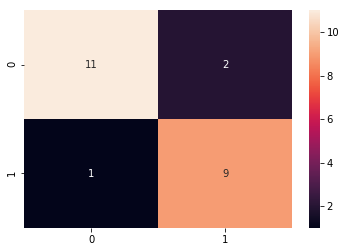

In [17]:
# visualize with seaborn library
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

### Logistic regression for Binary Classification

Confusion matrix: 
 [[12  1]
 [ 1  9]]
Classification report: 
              precision    recall  f1-score   support

         -1       0.92      0.92      0.92        13
          1       0.90      0.90      0.90        10

avg / total       0.91      0.91      0.91        23



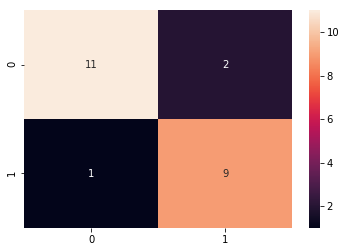

In [33]:
X = np.array(df.loc[:,['level','deaths','kills']])
y = df.loc[:,'game_status']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fir the classifier to the training data
logreg.fit(X_train, y_train) 

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)


# Compute and print the confusion matrix and classification report
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred))
print('Classification report: \n',classification_report(y_test,y_pred))

# visualize with seaborn library
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

### Plotting and ROC curve

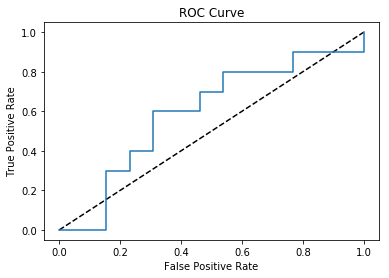

In [35]:
X_features = ['level','deaths','kills']
y_target = 'game_status'

X = np.array(df.loc[:,X_features])
y = df.loc[:,y_target]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fir the classifier to the training data
logreg.fit(X_train, y_train) 

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr(False Positive Rate), tpr(True Positive Rate), thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Area under the ROC curve (AUC)

In [29]:
def change_to_zero(x):
    if x == -1:
        return 0
    else: return 1

# X_features = ['level','deaths','kills']
X_features = ['level','creep_score','gold','experience_gained','kills','deaths','assists']
y_target = 'game_status'

X = np.array(df.loc[:,X_features])
y = df.loc[:,y_target]

# Change values to binary
y = y.apply(change_to_zero)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fir the classifier to the training data
logreg.fit(X_train, y_train) 

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

#print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.9384615384615385
AUC scores computed using 5-fold cross-validation: [1.         0.83333333 0.86666667 0.93333333 0.9       ]


### Pipepline for Regression